# Analysis of Toto Results
From 27 Dec 2021 - 26 Dec 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results = pd.read_csv('results/toto_results.csv')
locations = pd.read_csv('results/toto_win_locations.csv')

total_draws = results.index.nunique()

In [4]:
dates = results['Date'].unique()
print(dates.max())

2024-12-30 00:00:00


In [48]:
print(total_draws)
results.head()


314
<class 'pandas.core.indexes.base.Index'>


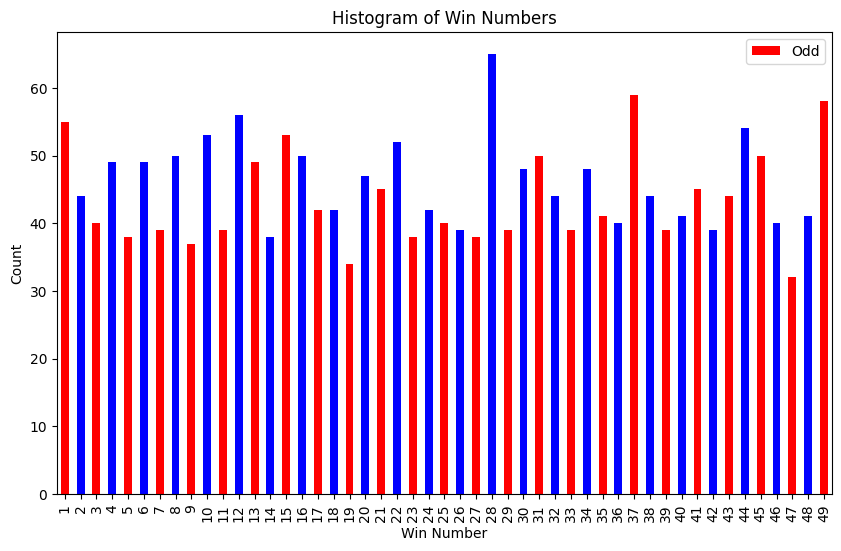

In [50]:
# Count the numbers
number_counts = results['Win Number'].value_counts().sort_index()

# Convert Series to DataFrame
number_counts_df = number_counts.to_frame(name='Count')

# Add a new column 'Odd or Even'
number_counts_df['Odd or Even'] = number_counts_df.index % 2 == 0 # True if even, False if odd

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
number_counts_df['Count'].plot(kind='bar', color=number_counts_df['Odd or Even'].map({True: 'blue', False: 'red'}))
plt.legend(labels=['Odd', 'Even'])
plt.xlabel('Win Number')
plt.ylabel('Count')
plt.title('Histogram of Win Numbers')
plt.show()

In [54]:
## Show the Win Numbers with the smallest counts
number_counts_df.sort_index().sort_values(by='Count').head(10)

,Count,Odd or Even
Win Number,,
47,32,False
19,34,False
9,37,False
23,38,False
27,38,False
5,38,False
14,38,True
42,39,True
26,39,True


In [55]:
# remove latest draw
latest_draw_date = results["Date"].max()
print(latest_draw_date)
results = results[results["Date"] != latest_draw_date]

# Count the numbers
number_counts = results['Win Number'].value_counts().sort_index().sort_values()
print(number_counts.head(10))
# 8, 21, 30, 35, 44, 49, 39


2024-12-26
Win Number
47    32
19    34
9     37
39    38
23    38
27    38
5     38
14    38
26    39
11    39
Name: count, dtype: int64


In [35]:
from scipy.stats import ttest_ind

# Split the odd and even numbers into different dataframes
odd_numbers = number_counts_df[number_counts_df['Odd or Even'] == False]
even_numbers = number_counts_df[number_counts_df['Odd or Even'] == True]

print(f"Mean of odd numbers: {odd_numbers['Count'].mean()}")
print(f"Mean of even numbers: {even_numbers['Count'].mean()}")
# Perform t-test
t_stat, p_value = ttest_ind(even_numbers['Count'], odd_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

Mean of odd numbers: 43.32
Mean of even numbers: 46.458333333333336
t-statistic: 1.5790206700462943
p-value: 0.1210387903883322


In [33]:
# Split the 1-24 and 25-49 numbers into different dataframes
bot_half_numbers = number_counts_df[number_counts_df.index < 25]
top_half_numbers = number_counts_df[number_counts_df.index >= 25]

# Perform t-test
t_stat, p_value = ttest_ind(bot_half_numbers['Count'], top_half_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 0.1773855553636044
p-value: 0.8599678246272873


In [34]:
Fibonacci = [1, 2, 3, 5, 8, 13, 21, 34]
Fibonacci_numbers = number_counts_df[number_counts_df.index.isin(Fibonacci)]
Non_Fibonacci_numbers = number_counts_df[~number_counts_df.index.isin(Fibonacci)]

# Perform t-test
t_stat, p_value = ttest_ind(Fibonacci_numbers['Count'], Non_Fibonacci_numbers['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

t-statistic: 0.5510700516959777
p-value: 0.5841959526612801


In [36]:
eight = [8, 18, 28, 38, 48]
eight = number_counts_df[number_counts_df.index.isin(eight)]
non_eight = number_counts_df[~number_counts_df.index.isin(eight)]

print(f"Mean of numbers ending with eight: {odd_numbers['Count'].mean()}")
print(f"Mean of numbers not ending with eight: {even_numbers['Count'].mean()}")

# Perform t-test
t_stat, p_value = ttest_ind(eight['Count'], non_eight['Count'])
print('t-statistic:', t_stat)
print('p-value:', p_value)

Mean of numbers ending with eight: 43.32
Mean of numbers not ending with eight: 46.458333333333336
t-statistic: 1.030759647311221
p-value: 0.3074241078835729
